In [28]:
from statistics import *
import pandas as pd
import numpy as np
import seaborn as sns #กราฟ
import matplotlib.pyplot as plt #กราฟ
import calendar #ปฏิทิน
from datetime import datetime
#import plotly.express as px 
import sklearn
%matplotlib inline    
%config inlineBackend.figure_format = 'retina'   #ใช้ความละเอียดสูงในการสร้างกราฟ

In [29]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'sklearn version: {sklearn.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version: 1.4.4
numpy version: 1.21.5
sklearn version: 1.0.2
seaborn version: 0.11.2


In [30]:
#ทำการ import data เก็บไว้ในตัวเเปรที่ชื่อ data 
#ทำการอ่านไฟล์นามสกุล csv ด้วยคำสั่ง to_csv (to_excel)
data = pd.read_csv("C:/Users/ACER/Desktop/data.csv")

EDA (Exploratory Data Analysis)


In [31]:
#เช็คจำนวน ROW เเละ Columns
data.shape

(1500014, 15)

In [32]:
#คำสั่งดูตัวอย่าง data 5 Row 
data.head()

,Unnamed: 0,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
2,2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
3,3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
4,4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00


In [33]:
#ลบ Columns  /// data= data.drop คือให้ตัวเเปรdataตัวใหม่ทับเก่า
    #เพื่อจะได้ใช้อันใหม่ที่ Drop Columnsไปเเล้ว
data = data.drop(columns=['Unnamed: 0'])

In [34]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00


In [35]:
data.shape

(1500014, 14)

In [36]:
#หัวข้อ Columns 
list(data.columns)

['Region',
 'Country',
 'Item Type',
 'Sales Channel',
 'Order Priority',
 'Order Date',
 'Order ID',
 'Ship Date',
 'Units Sold',
 'Unit Price',
 'Unit Cost',
 'Total Revenue',
 'Total Cost',
 'Total Profit']

In [37]:
#บงบอกค่าเชิงสถิติ //ทศนิยม2ตำเเหน่ง
data.describe() .round(2)

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.500014e+06,1500014.00,1500014.00,1500014.00,1500009.00,1500009.00,1.500009e+06
mean,5.500679e+08,4999.30,266.05,187.55,1329889.20,937489.14,5.939205e+07
std,2.599833e+08,2885.55,217.00,175.67,1468814.34,1149109.12,7.144790e+10
min,1.000012e+08,1.00,9.33,6.92,9.33,6.92,2.410000e+00
25%,3.246868e+08,2501.00,81.73,35.84,277718.54,161817.60,9.506640e+04
50%,5.497915e+08,4998.00,154.06,97.44,785329.26,467357.49,2.813704e+05
75%,7.756273e+08,7498.00,421.89,263.33,1821933.36,1196571.52,5.654252e+05
max,9.999999e+08,10000.00,668.27,524.96,6682700.00,5249600.00,8.750000e+13


In [38]:
# คำสั่ง info เป็นการดูภาพของ data เช่นกัน เเต่จะเห็นข้้อมูลใน columns นั้นๆด้วย
    # เอาไว้ดู nan เพื่อไปจัดการก่อนเอาไปวิเคราะห์
data.info

<bound method DataFrame.info of                                     Region           Country  Item Type  \
0                       Sub-Saharan Africa      South Africa     Fruits   
1                       Sub-Saharan Africa      South Africa     Fruits   
2             Middle East and North Africa           Morocco    Clothes   
3             Middle East and North Africa           Morocco    Clothes   
4                    Australia and Oceania  Papua New Guinea       Meat   
...                                    ...               ...        ...   
1500009                               Asia             India     Snacks   
1500010              Australia and Oceania               NaN  Household   
1500011  Central America and the Caribbean               NaN  Household   
1500012                               Asia            Brunei     Cereal   
1500013       Middle East and North Africa            Israel  Beverages   

        Sales Channel Order Priority  Order Date   Order ID   Ship 

# Prepara Data ก่อนวิเคราะห์ข้อมูล

วิธีจัดการกับ row ที่เป็น notnull

In [39]:
#ลบ Country ที่เป็น 0 โดยจะ Filter ข้อมูลที่cuonty เป็น 0 ก่อนโดยใช้คำสั่ง .notnull()
# Business user ต้องรู้ว่าข้อมูลไหนสำคัญ หรือไม่สำคัญ 
data = data[data["Country"] .notnull() ]
###
data.shape

(1500008, 14)

In [40]:
data.info

<bound method DataFrame.info of                                Region           Country        Item Type  \
0                  Sub-Saharan Africa      South Africa           Fruits   
1                  Sub-Saharan Africa      South Africa           Fruits   
2        Middle East and North Africa           Morocco          Clothes   
3        Middle East and North Africa           Morocco          Clothes   
4               Australia and Oceania  Papua New Guinea             Meat   
...                               ...               ...              ...   
1500006            Sub-Saharan Africa          Zimbabwe  Office Supplies   
1500008         Australia and Oceania           Vanuatu           Fruits   
1500009                          Asia             India           Snacks   
1500012                          Asia            Brunei           Cereal   
1500013  Middle East and North Africa            Israel        Beverages   

        Sales Channel Order Priority  Order Date   Orde

In [41]:
# เปลี่ยนชื่อ Columns 
data = data.rename(columns = {"Item Type" : "Item_Type",
                             "Order Date" : "Order_Date"
                             })

In [42]:
list(data.columns)

['Region',
 'Country',
 'Item_Type',
 'Sales Channel',
 'Order Priority',
 'Order_Date',
 'Order ID',
 'Ship Date',
 'Units Sold',
 'Unit Price',
 'Unit Cost',
 'Total Revenue',
 'Total Cost',
 'Total Profit']

In [43]:
#เพิ่มColumns
        #margin 
#ทศนิยม 2 ตำเเหน่ง
data["%margin"] = ((data['Total Profit'] / data[ 'Total Revenue']) *100) .round(2) 

In [44]:
data.head(2)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83


In [48]:
#สร้าง funtion เพื่อเตรียมนำไปใช้
# If-else ถ้า margin >30 =good  ถ้าไม่ใช่ bad

def if_condition(row) :
    if row["%margin"] > 30:
        val = "good"                   
    else :
            val = "bad"
    return val

# Pandas_Axis_Index_Columns

 Axis
    data.mean(axis = index) = data.mean(axis = 0) = data.mean() = การทำงานเเบบปกติ *คิดตาม Columns 
    *** data.mean(axis = 1) = data.mean(axis = Columns) คิดตาม Row 
 
     
https://www.youtube.com/watch?v=29RJJ_Ia3SI

In [49]:
#สร้าง columns ใหม่  เพื่อลองรับ funtion If-else
data["dicision"] = data.apply(if_condition, axis = 1) # axis = 1  คือcolumns

In [50]:
data.head(2)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bad
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bad


# plot graph scatter plot เพื่อดูว่าค่าผิดปกติ
        

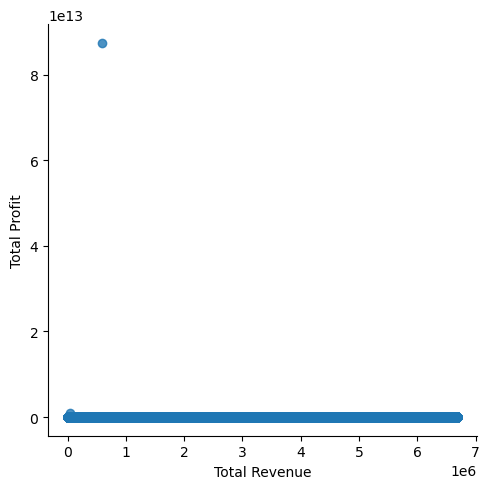

In [51]:
sns.lmplot(x = "Total Revenue", y = "Total Profit", data = data , ci= None) 
#CI = confident index (จุดตัด)

ค่ามากที่สุด max ดูค่าผิดปกติในกราฟว่าค่าอะไรมากที่สุด


In [52]:
data.loc[data["Total Profit"].idxmax()]

Region            Sub-Saharan Africa
Country                        Ghana
Item_Type            Office Supplies
Sales Channel                    NaN
Order Priority                     L
Order_Date                 3/23/2017
Order ID                   601245963
Ship Date                  4/15/2017
Units Sold                       896
Unit Price                    651.21
Unit Cost                     524.96
Total Revenue              583484.16
Total Cost                 470364.16
Total Profit        87500000000000.0
%margin           14996122602.540001
dicision                        good
Name: 1500003, dtype: object

## เรียกดูค่า สูงสุด 10 row 

In [53]:
data.sort_values("Total Profit", ascending = False) .head(10) 
#Ascending =False---> มากไปน้อย Ascending = true ---> น้อยไปมาก

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
1500003,Sub-Saharan Africa,Ghana,Office Supplies,NaN,L,3/23/2017,601245963,4/15/2017,896,651.21,524.96,583484.16,470364.16,8.750000e+13,1.499612e+10,good
1500005,Sub-Saharan Africa,Uganda,Personal Care,Online,M,6/19/2014,539471471,7/21/2014,451,81.73,56.67,36860.23,25558.17,1.000000e+12,2.712951e+09,good
897995,Asia,Maldives,Cosmetics,Online,H,4/12/2016,340228402,5/23/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
1279511,Asia,Kyrgyzstan,Cosmetics,Offline,H,2/28/2016,952044570,3/18/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
969307,Sub-Saharan Africa,South Sudan,Cosmetics,Offline,L,4/3/2016,462591636,4/30/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
275470,Sub-Saharan Africa,Senegal,Cosmetics,Online,M,2/18/2016,174407804,2/22/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
942016,Middle East and North Africa,United Arab Emirates,Cosmetics,Offline,L,3/8/2016,829681336,4/11/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
1467797,Europe,Romania,Cosmetics,Online,M,3/17/2016,707318103,5/4/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
583126,Asia,Maldives,Cosmetics,Online,H,4/11/2016,340228402,5/22/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
1426741,Sub-Saharan Africa,Zambia,Cosmetics,Offline,C,6/30/2016,138959300,7/20/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good


In [54]:
print(8.5*(10**13))

85000000000000.0


# ลบ Row จาก Index 
การลบ Columns  -->  data = data.drop(columns=['Unnamed: 0']) 

In [55]:
data = data.drop(1500003)
data = data.drop(1500005)

In [56]:
#ลบค่าผิดปกติ 2ตัวไปเเล้ว 
data.sort_values("Total Profit", ascending = False) .head(3)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
275470,Sub-Saharan Africa,Senegal,Cosmetics,Online,M,2/18/2016,174407804,2/22/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,good
829606,Europe,Armenia,Cosmetics,Offline,C,4/21/2016,217865169,4/26/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,good
1279511,Asia,Kyrgyzstan,Cosmetics,Offline,H,2/28/2016,952044570,3/18/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,good


In [57]:
 data.sort_values("Total Profit", ascending = True) .head(5)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
492352,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
1016058,Europe,Luxembourg,Fruits,Offline,L,6/14/2013,412308156,7/19/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
801014,Central America and the Caribbean,Trinidad and Tobago,Fruits,Offline,L,9/18/2013,866312587,10/31/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
965759,Sub-Saharan Africa,Malawi,Fruits,Offline,C,5/18/2013,779397857,6/29/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
576730,Central America and the Caribbean,Honduras,Fruits,Online,M,6/22/2013,289944922,8/11/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad


In [58]:
data

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bad
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bad
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00,13.56,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500006,Sub-Saharan Africa,Zimbabwe,Office Supplies,Offline,C,3/28/2011,953361213,4/8/2011,9623,651.21,524.96,NaN,NaN,NaN,NaN,bad
1500008,Australia and Oceania,Vanuatu,Fruits,Online,C,11/3/2013,571997869,11/11/2013,5735,9.33,6.92,NaN,NaN,NaN,NaN,bad
1500009,Asia,India,Snacks,Online,L,10/10/2012,440306556,11/20/2012,5349,152.58,97.44,NaN,NaN,NaN,NaN,bad
1500012,Asia,Brunei,Cereal,Offline,L,5/28/2013,153842341,7/16/2013,4222,205.70,117.11,NaN,NaN,NaN,NaN,bad


In [59]:
data.sort_values("Total Revenue", ascending = False) .head(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
468659,Sub-Saharan Africa,Comoros,Household,Online,L,6/26/2011,546093308,7/3/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
142999,Sub-Saharan Africa,Senegal,Household,Online,C,2/24/2011,459178578,3/2/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
1099878,Europe,Bosnia and Herzegovina,Household,Online,M,6/9/2011,790819776,7/7/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
1085903,Europe,Sweden,Household,Offline,C,6/18/2011,668456542,7/31/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
803322,Sub-Saharan Africa,Zimbabwe,Household,Offline,H,7/5/2011,423730075,7/26/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
727845,Middle East and North Africa,Yemen,Household,Offline,H,3/14/2011,214452111,4/18/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
402635,Sub-Saharan Africa,Cape Verde,Household,Online,M,5/14/2011,257909476,6/19/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
1028057,Europe,Armenia,Household,Offline,H,4/26/2011,502635943,5/2/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
142998,Sub-Saharan Africa,Senegal,Household,Online,C,2/24/2011,459178578,3/2/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
1399426,Europe,Slovakia,Household,Online,C,5/5/2011,380272710,5/26/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad


In [60]:
data.sort_values("Total Revenue", ascending = True ).head(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
470541,Europe,Monaco,Fruits,Offline,C,7/27/2013,700491988,8/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
492351,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
575497,Middle East and North Africa,Tunisia,Fruits,Online,M,8/31/2013,211039054,9/14/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
470540,Europe,Monaco,Fruits,Offline,C,7/27/2013,700491988,8/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
801014,Central America and the Caribbean,Trinidad and Tobago,Fruits,Offline,L,9/18/2013,866312587,10/31/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
426590,Middle East and North Africa,Qatar,Fruits,Online,H,7/18/2013,822855222,8/30/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
1016058,Europe,Luxembourg,Fruits,Offline,L,6/14/2013,412308156,7/19/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
1239029,Asia,China,Fruits,Offline,L,7/10/2013,945218455,8/7/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
575498,Middle East and North Africa,Tunisia,Fruits,Online,M,8/31/2013,211039054,9/14/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
492352,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad


In [61]:
data.sort_values("%margin", ascending = False).head(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
1092717,Central America and the Caribbean,Antigua and Barbuda,Clothes,Offline,H,12/23/2016,202264583,1/12/2017,3440,109.28,35.84,375923.20,123289.60,252633.60,67.2,good
1244997,Europe,France,Clothes,Offline,C,11/21/2012,334083354,12/10/2012,1543,109.28,35.84,168619.04,55301.12,113317.92,67.2,good
398974,Europe,France,Clothes,Online,M,9/15/2013,835613095,10/14/2013,5339,109.28,35.84,583445.92,191349.76,392096.16,67.2,good
1245020,Sub-Saharan Africa,Eritrea,Clothes,Offline,C,10/31/2015,608909356,11/28/2015,8665,109.28,35.84,946911.20,310553.60,636357.60,67.2,good
158959,Central America and the Caribbean,Panama,Clothes,Offline,L,6/27/2010,991353738,7/15/2010,2456,109.28,35.84,268391.68,88023.04,180368.64,67.2,good
158960,Central America and the Caribbean,Panama,Clothes,Offline,L,6/27/2010,991353738,7/15/2010,2456,109.28,35.84,268391.68,88023.04,180368.64,67.2,good
610824,Australia and Oceania,Federated States of Micronesia,Clothes,Online,C,9/21/2016,818090331,10/21/2016,9964,109.28,35.84,1088865.92,357109.76,731756.16,67.2,good
861058,Europe,United Kingdom,Clothes,Online,H,6/11/2016,448429572,7/1/2016,9130,109.28,35.84,997726.40,327219.20,670507.20,67.2,good
861060,Sub-Saharan Africa,Madagascar,Clothes,Online,C,6/6/2015,936628949,7/19/2015,8175,109.28,35.84,893364.00,292992.00,600372.00,67.2,good
1245001,Sub-Saharan Africa,Equatorial Guinea,Clothes,Offline,L,12/18/2011,223178088,12/29/2011,2211,109.28,35.84,241618.08,79242.24,162375.84,67.2,good


In [62]:
data.sort_values("%margin", ascending = True).head(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
143232,Sub-Saharan Africa,Uganda,Meat,Offline,C,4/10/2013,598110997,5/14/2013,3190,421.89,364.69,1345829.10,1163361.10,182468.0,13.56,bad
831099,Asia,Thailand,Meat,Offline,H,9/13/2015,261373174,9/14/2015,4985,421.89,364.69,2103121.65,1817979.65,285142.0,13.56,bad
556991,Middle East and North Africa,Morocco,Meat,Online,H,10/31/2012,510798871,12/9/2012,5592,421.89,364.69,2359208.88,2039346.48,319862.4,13.56,bad
1151936,Sub-Saharan Africa,Comoros,Meat,Online,C,10/27/2015,775944459,11/19/2015,8063,421.89,364.69,3401699.07,2940495.47,461203.6,13.56,bad
623841,Sub-Saharan Africa,Zimbabwe,Meat,Online,M,4/4/2014,380536210,5/22/2014,7976,421.89,364.69,3364994.64,2908767.44,456227.2,13.56,bad
232678,Europe,Denmark,Meat,Online,C,11/27/2015,505518567,12/5/2015,3033,421.89,364.69,1279592.37,1106104.77,173487.6,13.56,bad
743311,Central America and the Caribbean,Dominica,Meat,Offline,L,4/15/2013,884086835,5/23/2013,9796,421.89,364.69,4132834.44,3572503.24,560331.2,13.56,bad
743303,Central America and the Caribbean,Nicaragua,Meat,Online,H,11/25/2013,309718167,1/7/2014,1343,421.89,364.69,566598.27,489778.67,76819.6,13.56,bad
668415,Europe,Luxembourg,Meat,Online,M,3/21/2017,741202771,3/22/2017,7226,421.89,364.69,3048577.14,2635249.94,413327.2,13.56,bad
272985,Middle East and North Africa,Kuwait,Meat,Offline,H,9/22/2014,974938189,11/8/2014,4730,421.89,364.69,1995539.70,1724983.70,270556.0,13.56,bad


## เรียกดูข้อมูลจาก ล่างขึ้นบน xอันดับ 

In [63]:
data.tail(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
1499996,Australia and Oceania,Samoa,Snacks,Offline,M,8/21/2013,346272170,9/11/2013,8485,152.58,97.44,1294641.30,826778.40,467862.90,36.14,good
1499997,Europe,Denmark,Baby Food,Online,L,2/27/2017,458885467,3/23/2017,3262,255.28,159.42,832723.36,520028.04,312695.32,37.55,good
1499998,Middle East and North Africa,Jordan,Cereal,Offline,L,5/27/2012,925852906,6/22/2012,9304,205.70,117.11,1913832.80,1089591.44,824241.36,43.07,good
1499999,Sub-Saharan Africa,Djibouti,Fruits,Online,H,9/1/2013,385552585,9/7/2013,2432,9.33,6.92,22690.56,16829.44,5861.12,25.83,bad
1500004,NaN,Tanzania,Cosmetics,Offline,L,5/23/2016,739008080,5/24/2016,7768,437.20,263.33,3396169.60,2045547.44,1350622.16,39.77,good
1500006,Sub-Saharan Africa,Zimbabwe,Office Supplies,Offline,C,3/28/2011,953361213,4/8/2011,9623,651.21,524.96,NaN,NaN,NaN,NaN,bad
1500008,Australia and Oceania,Vanuatu,Fruits,Online,C,11/3/2013,571997869,11/11/2013,5735,9.33,6.92,NaN,NaN,NaN,NaN,bad
1500009,Asia,India,Snacks,Online,L,10/10/2012,440306556,11/20/2012,5349,152.58,97.44,NaN,NaN,NaN,NaN,bad
1500012,Asia,Brunei,Cereal,Offline,L,5/28/2013,153842341,7/16/2013,4222,205.70,117.11,NaN,NaN,NaN,NaN,bad
1500013,Middle East and North Africa,Israel,Beverages,Offline,H,9/8/2013,371502530,10/13/2013,4709,47.45,31.79,NaN,NaN,NaN,NaN,bad


## หาค่า NaN

In [64]:
data.isnull() .sum()

Region            1
Country           0
Item_Type         0
Sales Channel     0
Order Priority    0
Order_Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     5
Total Cost        5
Total Profit      5
%margin           5
dicision          0
dtype: int64

## การเเก้ค่า Nan 
- ลบRow คำสั่ง .drop
- แทนค่าด้วย0 .fillna(0)
- .fillna(data.mean())
- .fillna(data.max())
- .fillna(data.min())
- .fillna(data.mode())

In [65]:
#จะคำนวนค่า ทับลงไปอันเดิม
data["Total Revenue"]  = (data["Units Sold"] * data["Unit Price"]) .round(2)
data["Total Cost"]        = (data["Units Sold"] * data["Unit Cost"]) .round(2)
data["Total Profit"]       =(data["Total Revenue"] - data["Total Cost"]) .round(2)
data["%margin"]         =((data["Total Profit"] / data["Total Revenue"])*100) .round(2)

In [66]:
data.info

<bound method DataFrame.info of                                Region           Country        Item_Type  \
0                  Sub-Saharan Africa      South Africa           Fruits   
1                  Sub-Saharan Africa      South Africa           Fruits   
2        Middle East and North Africa           Morocco          Clothes   
3        Middle East and North Africa           Morocco          Clothes   
4               Australia and Oceania  Papua New Guinea             Meat   
...                               ...               ...              ...   
1500006            Sub-Saharan Africa          Zimbabwe  Office Supplies   
1500008         Australia and Oceania           Vanuatu           Fruits   
1500009                          Asia             India           Snacks   
1500012                          Asia            Brunei           Cereal   
1500013  Middle East and North Africa            Israel        Beverages   

        Sales Channel Order Priority  Order_Date   Orde

In [67]:
data.isnull().sum()

Region            1
Country           0
Item_Type         0
Sales Channel     0
Order Priority    0
Order_Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
%margin           0
dicision          0
dtype: int64

## แยก Date ปี/เดือน เพิ่มColumns  จาก"Order_Date"

In [68]:
data['year'] = pd.DatetimeIndex(data["Order_Date"]).year

In [69]:
data['month'] = pd.DatetimeIndex(data['Order_Date']).month

In [70]:
data.head(5)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision,year,month
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bad,2012,7
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bad,2012,7
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good,2013,9
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good,2013,9
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00,13.56,bad,2015,5


In [71]:
data = data.replace({"month":{
    1 : "1.January",
    2 : "2.Febuary",
    3 : "3.March",
    4 : "4.April",
    5 : "5.May",
    6 : "6.June",
    7 : "7.july",
    8 : "8.August",
    9 : "9.Saptember",
    10 : "10.October",
    11 : "11.November",
    12 : "12.December"
}})

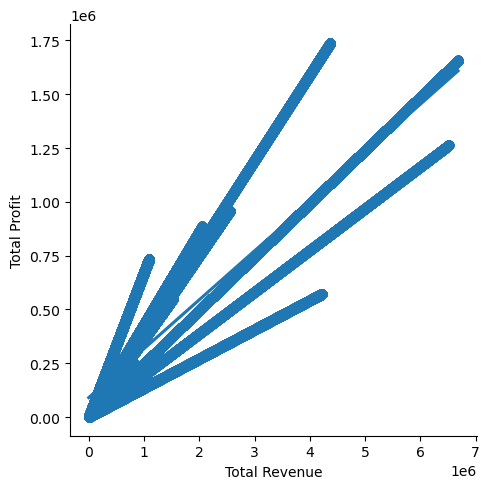

In [72]:
#หลังจาก Clean Data จะลองplot grap ตรวจความผิดปกอีก
sns.lmplot(x="Total Revenue", y = "Total Profit", data=data, ci=None)

In [73]:
data.sort_values("Total Profit",ascending = True) 

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision,year,month
576729,Central America and the Caribbean,Honduras,Fruits,Online,M,6/22/2013,289944922,8/11/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,6.June
801014,Central America and the Caribbean,Trinidad and Tobago,Fruits,Offline,L,9/18/2013,866312587,10/31/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,9.Saptember
669807,Central America and the Caribbean,Grenada,Fruits,Online,H,5/10/2013,901761090,6/7/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,5.May
492351,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,5.May
492352,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,5.May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969307,Sub-Saharan Africa,South Sudan,Cosmetics,Offline,L,4/3/2016,462591636,4/30/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,4.April
1180739,Europe,Sweden,Cosmetics,Offline,L,6/12/2016,383685767,7/24/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,6.June
691631,Europe,Slovakia,Cosmetics,Online,M,4/29/2016,995501935,5/19/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,4.April
1467797,Europe,Romania,Cosmetics,Online,M,3/17/2016,707318103,5/4/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,3.March


In [74]:
data.sort_values("Total Profit",ascending = False) 

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision,year,month
969307,Sub-Saharan Africa,South Sudan,Cosmetics,Offline,L,4/3/2016,462591636,4/30/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,4.April
691631,Europe,Slovakia,Cosmetics,Online,M,4/29/2016,995501935,5/19/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,4.April
342508,Sub-Saharan Africa,Comoros,Cosmetics,Online,H,6/20/2016,261322534,6/25/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,6.June
829606,Europe,Armenia,Cosmetics,Offline,C,4/21/2016,217865169,4/26/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,4.April
1218962,Sub-Saharan Africa,Botswana,Cosmetics,Offline,C,3/25/2016,584954869,4/6/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,3.March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470540,Europe,Monaco,Fruits,Offline,C,7/27/2013,700491988,8/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,7.july
576730,Central America and the Caribbean,Honduras,Fruits,Online,M,6/22/2013,289944922,8/11/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,6.June
1239029,Asia,China,Fruits,Offline,L,7/10/2013,945218455,8/7/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,7.july
426590,Middle East and North Africa,Qatar,Fruits,Online,H,7/18/2013,822855222,8/30/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,7.july


In [75]:
data.sort_values("%margin",ascending = False)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision,year,month
1087185,Asia,South Korea,Clothes,Offline,H,2/9/2014,770135867,2/10/2014,9172,109.28,35.84,1002316.16,328724.48,673591.68,67.20,good,2014,2.Febuary
108726,Sub-Saharan Africa,Ethiopia,Clothes,Online,C,2/4/2011,222123229,2/17/2011,54,109.28,35.84,5901.12,1935.36,3965.76,67.20,good,2011,2.Febuary
1155029,Australia and Oceania,East Timor,Clothes,Offline,C,3/12/2010,260976207,3/15/2010,7514,109.28,35.84,821129.92,269301.76,551828.16,67.20,good,2010,3.March
402045,Europe,Germany,Clothes,Online,H,6/30/2013,367244899,7/22/2013,4781,109.28,35.84,522467.68,171351.04,351116.64,67.20,good,2013,6.June
402047,Australia and Oceania,Vanuatu,Clothes,Online,M,7/21/2011,586752593,8/4/2011,1986,109.28,35.84,217030.08,71178.24,145851.84,67.20,good,2011,7.july
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350837,Europe,Ireland,Meat,Offline,M,10/6/2014,573015391,11/3/2014,6843,421.89,364.69,2886993.27,2495573.67,391419.60,13.56,bad,2014,10.October
1024564,Middle East and North Africa,Afghanistan,Meat,Offline,M,6/11/2013,429389321,7/11/2013,4697,421.89,364.69,1981617.33,1712948.93,268668.40,13.56,bad,2013,6.June
111152,Europe,Slovakia,Meat,Offline,H,3/15/2011,609095180,4/12/2011,3654,421.89,364.69,1541586.06,1332577.26,209008.80,13.56,bad,2011,3.March
111153,Europe,Slovakia,Meat,Offline,H,3/15/2011,609095180,4/12/2011,3654,421.89,364.69,1541586.06,1332577.26,209008.80,13.56,bad,2011,3.March


In [76]:
Total_Amount = data["Total Profit"].sum().round(2)
Total_Amount

588603226440.65

In [77]:
Middle_East_Amount = data["Total Profit"][data["Region"]=="Middle East and North Africa"].sum() .round(2)
Middle_East_Amount

73093917891.11

In [78]:
print('Middle_East_Amount : ' +str(Middle_East_Amount) + "บาท คิดเป็น" +str((Middle_East_Amount/Total_Amount).round(2)*100)+ "%")

Middle_East_Amount : 73093917891.11บาท คิดเป็น12.0%


In [79]:
#[อยากรู้][ขอบเขต=ที่สนใจ].[อะไรที่อยากรุ้]
data["Total Profit"][data["Country"]== "Iraq"].max()

1736961.3

In [80]:
data["Total Profit"][data["Country"]== "Iraq"].apply(lambda x : "{:,}".format(x))

268           87,058.44
740            7,348.09
741            7,348.09
1399         683,206.08
1400         683,206.08
               ...     
1498512    1,433,730.23
1498890       566,051.2
1499277       83,530.44
1499721      892,300.84
1499954      995,927.36
Name: Total Profit, Length: 8086, dtype: object

# Group_By คล้ายsumif

In [81]:
data.groupby(["year","month","Item_Type","Order ID"]).sum() #ตัวอย่างนี้ ตัวแปรที่ใส่มีความหมายว่า ไม่ต้องเอาไป sum นั้นเอง

Units Sold  Unit Price  Unit Cost  \
year month     Item_Type  Order ID                                       
2010 1.January Baby Food  101137149        7585      255.28     159.42   
                          101335847        6384      255.28     159.42   
                          102081286        6976      255.28     159.42   
                          102279984        5775      255.28     159.42   
                          103224122        5166      255.28     159.42   
...                                         ...         ...        ...   
2017 7.july    Vegetables 994640195        4992      154.06      90.93   
                          995506656        1397      154.06      90.93   
                          995783030        3182      154.06      90.93   
                          996804845       11120      308.12     181.86   
                          999913632        5519      154.06      90.93   

                                     Total Revenue  Total Cost  Total Profit  \
year month     Item_Type  Order ID                                             
2010 1.January Baby Food  101137149     1936298.80  1209200.70     727098.10   
                          101335847     1629707.52  1017737.28     611970.24   
                          102081286     1780833.28  1112113.92     668719.36   
                          102279984     1474242.00   920650.50     553591.50   
                          103224122     1318776.48   823563.72     495212.76   
...                                            ...         ...           ...   
2017 7.july    Vegetables 994640195      769067.52   453922.56     315144.96   
                          995506656      215221.82   127029.21      88192.61   
                          995783030      490218.92   289339.26     200879.66   
                          996804845     1713147.20  1011141.60     702005.60   
                          999913632      850257.14   501842.67     348414.47   

                                     %margin  
year month     Item_Type  Order ID            
2010 1.January Baby Food  101137149    37.55  
                          101335847    37.55  
                          102081286    37.55  
                          102279984    37.55  
                          103224122    37.55  
...                                      ...  
2017 7.july    Vegetables 994640195    40.98  
                          995506656    40.98  
                          995783030    40.98  
                          996804845    81.96  
                          999913632    40.98  

[1285479 rows x 7 columns]

In [82]:
data.groupby(["month"])["Total Profit"].sum().round(2)

month
1.January      5.262556e+10
10.October     4.588399e+10
11.November    4.490212e+10
12.December    4.626535e+10
2.Febuary      4.782907e+10
3.March        5.281875e+10
4.April        5.113972e+10
5.May          5.280839e+10
6.June         5.111819e+10
7.july         5.240162e+10
8.August       4.610811e+10
9.Saptember    4.470235e+10
Name: Total Profit, dtype: float64

In [83]:
data.groupby(["Country","Item_Type"])["Total Profit"].sum()

Country      Item_Type      
Afghanistan  Baby Food          3.318292e+08
             Beverages          5.207576e+07
             Cereal             2.911936e+08
             Clothes            2.400776e+08
             Cosmetics          5.684838e+08
                                    ...     
Zimbabwe     Meat               1.907654e+08
             Office Supplies    4.377148e+08
             Personal Care      8.798709e+07
             Snacks             1.870779e+08
             Vegetables         2.121591e+08
Name: Total Profit, Length: 2220, dtype: float64

In [84]:
data.groupby(["Country","Item_Type"])["Total Profit"].sum().round(2).apply(lambda x : "{:,}".format(x))

Country      Item_Type      
Afghanistan  Baby Food          331,829,167.72
             Beverages            52,075,764.0
             Cereal             291,193,646.79
             Clothes            240,077,636.64
             Cosmetics          568,483,787.17
                                     ...      
Zimbabwe     Meat                190,765,432.0
             Office Supplies     437,714,810.0
             Personal Care       87,987,088.42
             Snacks              187,077,889.2
             Vegetables          212,159,097.1
Name: Total Profit, Length: 2220, dtype: object